In [1]:
import healpy 
import Tools
reload(Tools)  
    
energies, base = Tools.galprop2numpy(fits='/data/galprop2/output/pi0_decay_healpix_54_base_no_secondary.gz')
energies, F07 = Tools.galprop2numpy(fits='/data/galprop2/output/pi0_decay_healpix_54_F07_no_secondary.gz')
energies, NSPEB = Tools.galprop2numpy(fits='/data/galprop2/output/pi0_decay_healpix_54_NSPEB_no_secondary.gz')






In [ ]:
#energies, F07 = Tools.galprop2numpy(fits='/data/galprop2/output/pi0_decay_')

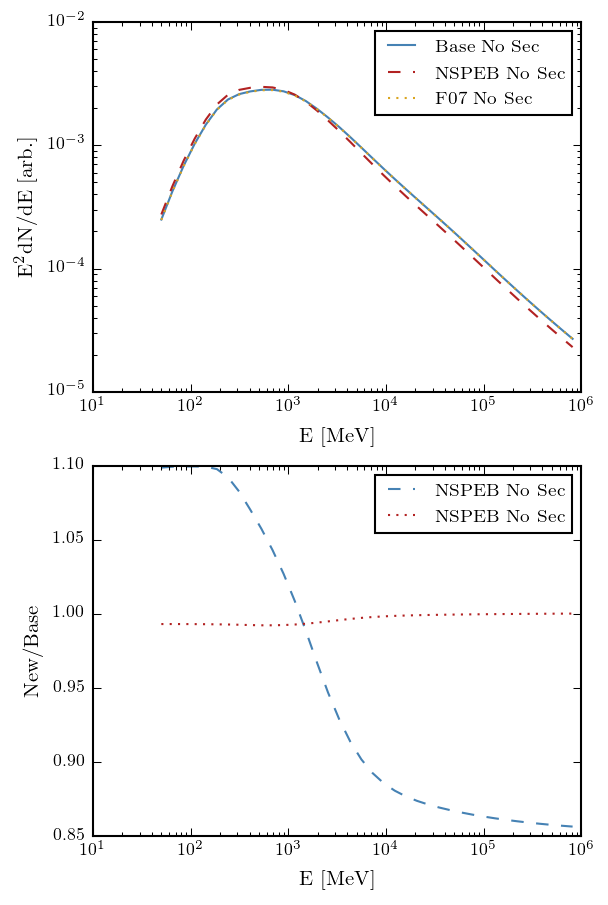

In [2]:
spec = np.array([np.mean(base[i]) for i in range(NSPEB.shape[0])])
spec2 = np.array([np.mean(NSPEB[i]) for i in range(NSPEB.shape[0])])
spec3 = np.array([np.mean(F07[i]) for i in range(NSPEB.shape[0])])
plt.figure(figsize=(4.2,7))
plt.subplot(211)

plt.loglog(energies, energies**2*spec, label='Base No Sec')
plt.loglog(energies, energies**2*spec2, label='NSPEB No Sec', ls='--')
plt.loglog(energies, energies**2*spec3, label='F07 No Sec',ls=':')

plt.legend()
plt.ylabel(r'$\rm{E^2 dN/dE}\ [arb.]$')
plt.xlabel(r'$\rm{E}\ [MeV]$')

plt.subplot(212)

plt.loglog(energies, spec2/spec, label='NSPEB No Sec', ls='--')
plt.loglog(energies, spec3/spec, label='NSPEB No Sec', ls=':')
plt.yscale('linear')
plt.legend()
plt.ylabel(r'$\rm{New/Base}$')
plt.xlabel(r'$\rm{E}\ [MeV]$')

(38, 196608)


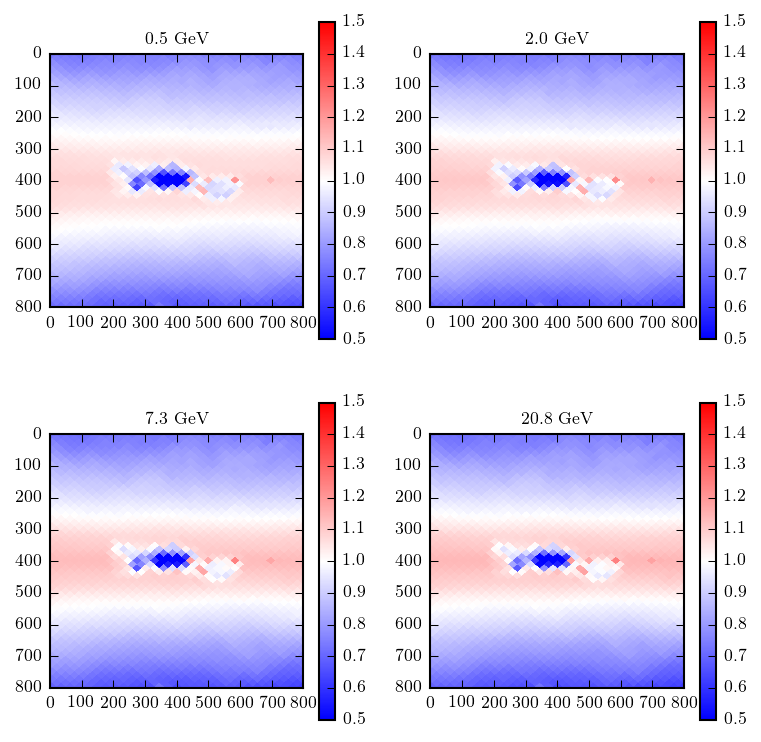

In [3]:
print base.shape
plt.figure(0, figsize=(6,6))
plt.figure(1, figsize=(6,6))
for i, i_bin in enumerate([9, 14, 19, 23]):
    plt.subplot(2,2,i+1)
    d1, d2 = base[i_bin], NSPEB[i_bin]
    d1 /= d1.mean()
    d2 /= d2.mean()
    plt.figure(0)
    cartMap = healpy.cartview((d2)/d1, hold=True, title='', return_projected_map=True, 
                              fig=0, lonra=[-10,10], latra=[-10,10])
    plt.figure(1)
    plt.imshow(cartMap, cmap='bwr', vmin=0.5,vmax=1.5)
    plt.colorbar()
    
    plt.title('%3.1f GeV' % (energies[i_bin]/1e3), fontsize=8)

    
plt.figure(0)    
plt.clf()

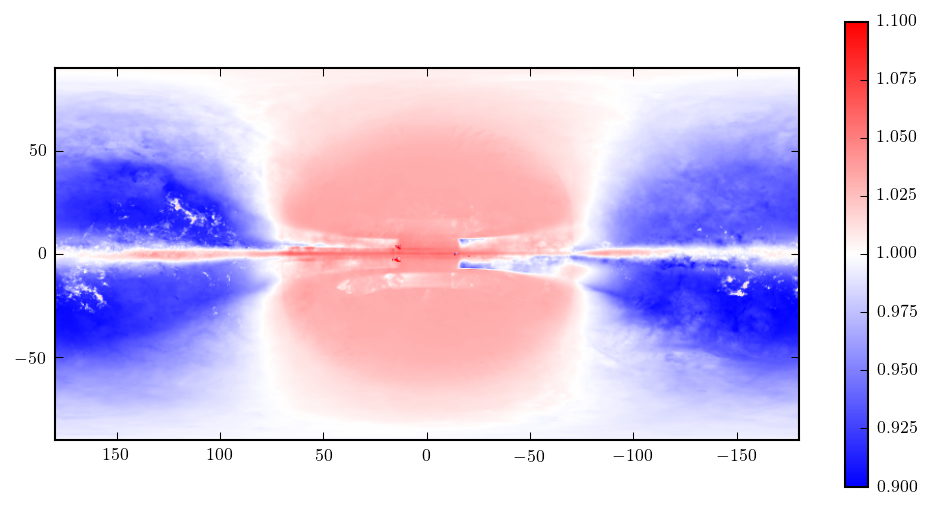

/home/carlson/ipython/IPython/kernel/__main__.py:22: RuntimeWarning: invalid value encountered in log10


<matplotlib.colorbar.Colorbar instance at 0x7f37700c8ef0>

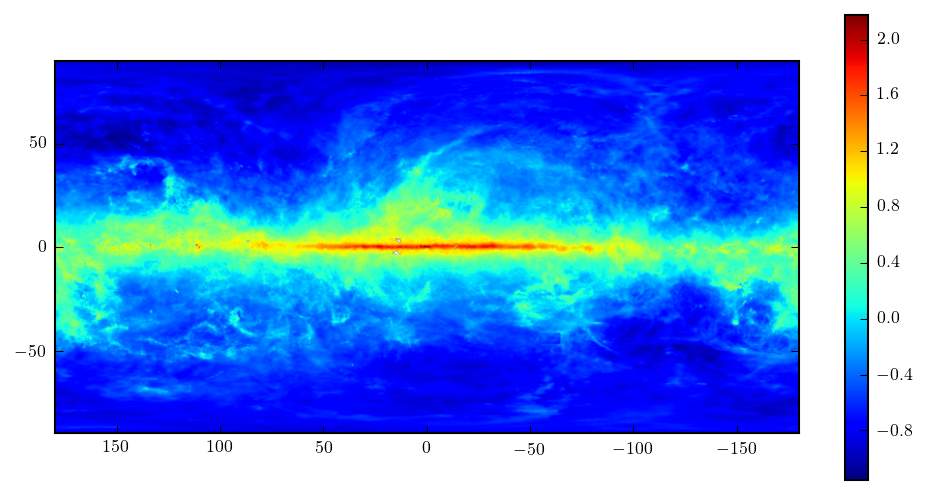

In [7]:
d1 = np.roll(pyfits.open('/data/galprop2/output/pion_decay_mapcube_54_base_no_secondary.gz')[0].data, 360, axis=2)[10]
d2 = np.roll(pyfits.open('/data/galprop2/output/pion_decay_mapcube_54_NSPEB_no_secondary.gz')[0].data, 360, axis=2)[10]

#d1 = np.roll(pyfits.open('/data/galprop2/output/pion_decay_HIR_mapcube_comp_10_54_base_no_secondary.gz')[0].data, 360, axis=2)[10]
#d2 = np.roll(pyfits.open('/data/galprop2/output/pion_decay_HIR_mapcube_comp_10_54_NSPEB_no_secondary.gz')[0].data, 360, axis=2)[10]

d1 /= np.mean(d1)
d2 /= np.mean(d2)
#plt.imshow(np.log(d1))
#plt.show()
#plt.imshow(np.log(d2))
#plt.show()
plt.figure(figsize=(8,4))
plt.imshow(d2/d1, cmap='bwr', vmin=0.90, vmax=1.1, extent=[-180,180,-90,90], origin='lower')
#plt.imshow(np.log10(d1), cmap='jet', extent=[-180,180,-90,90], origin='lower')
plt.xlim(180,-180)
plt.ylim(-90,90)
plt.colorbar()

plt.show()
plt.figure(figsize=(8,4))
plt.imshow(np.log10(d2), cmap='jet', extent=[-180,180,-90,90], origin='lower')
plt.xlim(180,-180)
plt.ylim(-90,90)
plt.colorbar()



In [26]:
#d1 = pyfits.open('/data/galprop2/output/bremss_healpix_54_NSPEB_no_secondary.gz')[1]

def ReadFits(fname):
    hdu = pyfits.open(fname)
    return np.array([hdu[1].data.field(i) for i in range(len(hdu[1].data[0]))])

#d1 = pyfits.open('/data/galprop2/output/bremss_healpix_54_base_no_secondary.gz')[1].data

import healpy
d1 = ReadFits('/data/galprop2/output/pi0_decay_healpix_54_NSPEB_H2_8500.gz')
d2 = ReadFits('/data/galprop2/output/pi0_decay_healpix_54_base_single_H2.gz')
b=30
m1,m2 = np.mean(d1[b]), np.mean(d2[b])


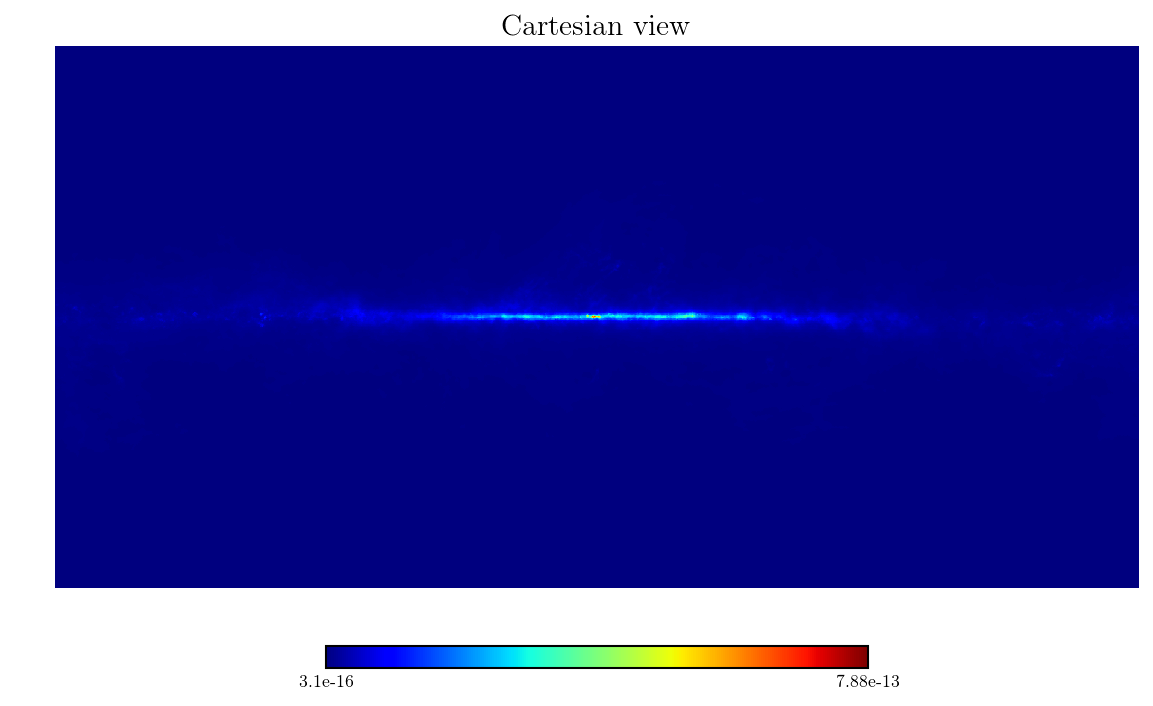

In [27]:
# print d1.shape
#m = healpy.cartview(d1[b]/d2[b], latra=(-40,40), lonra=(-40,40), return_projected_map=True, xsize=1800)
m = healpy.cartview(d1[b], return_projected_map=True, xsize=1800)
#plt.clf()
#plt.imshow(m,vmin=.6,vmax=1.4,cmap='bwr', origin='lower')
#plt.colorbar()

# m = healpy.cartview(np.log10(d1[b]), latra=(-90,90), lonra=(-180,180), return_projected_map=True,xsize=1280)
# plt.clf()
# plt.imshow(m,cmap='gist_heat', origin='lower',vmin=-9., vmax=-6.5)
# plt.show()

# m = healpy.cartview(np.log10(d2[b]), latra=(-90,90), lonra=(-180,180), return_projected_map=True,xsize=1280)
# plt.clf()
# plt.imshow(m,cmap='gist_heat', origin='lower',vmin=-9., vmax=-6.5)
# #plt.colorbar()
# plt.show()


In [15]:
print d1.header.cards

AttributeError: 'numpy.ndarray' object has no attribute 'header'

In [21]:
pyfits.open('/data/galprop2/FITS/')

[  1.18379090e-08   1.13959369e-08   1.17441402e-08 ...,   1.70940802e-08
   1.75234912e-08   1.74913897e-08]
